In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv


#### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [3]:
data = pd.read_csv("/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Objective
1. Based on Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen cluster the dataset
2. Apply PCA before clustering

In [4]:
data.shape

(440, 8)

#### Extracting features

In [5]:
x = data.iloc[:,2:]
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## **Standard Scaler**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stsc = sc.fit_transform(x)
x_stsc.shape

(440, 6)

In [7]:
x_stsc[0:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

#### Converting to dataframe

In [8]:
x_stsc_dataframe = pd.DataFrame(x_stsc,columns=x.columns)
x_stsc_dataframe.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [9]:
x_stsc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


#### Description of Dataframe

In [10]:
x_stsc_dataframe.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


### **PCA**

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

#### Model Building

In [12]:
pcomps = pca.fit_transform(x_stsc)
pcomps.shape

(440, 6)

In [13]:
pcomps

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

#### EigenValues and EigenVectors

In [14]:
eigen_values = pca.explained_variance_
eigen_vector = pca.components_
print("Eigen values : \n",eigen_values)
print("Eigen vector : \n",eigen_vector)

Eigen values : 
 [2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]
Eigen vector : 
 [[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


#### Mathematics

In [15]:
total = sum(eigen_values)
print("Sum of Eigen Values : ",total)
variance_eigen_value = [i*100/total for i in eigen_values]
print("Variance Eigen Values : \n",variance_eigen_value)
cumulative_variance_eigen_value = np.cumsum(variance_eigen_value)
print("Cumulative Variance Eigen Value : \n",cumulative_variance_eigen_value)

Sum of Eigen Values :  6.013667425968106
Variance Eigen Values : 
 [44.082892881128046, 28.376399526616957, 12.334412896786457, 9.395503752971488, 4.761272400688686, 1.0495185418083766]
Cumulative Variance Eigen Value : 
 [ 44.08289288  72.45929241  84.7937053   94.18920906  98.95048146
 100.        ]


([<matplotlib.patches.Wedge at 0x7a4f124ff190>,
 [Text(0.20330494935956153, 1.0810490726909239, 'PC1'),
  Text(-0.9547716051642884, -0.5462702462810951, 'PC2'),
  Text(0.24848211631838274, -1.0715673743960004, 'PC3'),
  Text(0.8688083921128747, -0.6746643445404845, 'PC4'),
  Text(1.0745511144599853, -0.2352443461866911, 'PC5'),
  Text(1.0994021286392857, -0.03626237090163891, 'PC6')],
 [Text(0.11089360874157901, 0.5896631305586857, '44.08%'),
  Text(-0.5207845119077936, -0.2979655888805973, '28.38%'),
  Text(0.13553569981002694, -0.584491295125091, '12.33%'),
  Text(0.4738954866070225, -0.36799873338571876, '9.40%'),
  Text(0.5861187897054465, -0.1283150979200133, '4.76%'),
  Text(0.5996738883487012, -0.019779475037257584, '1.05%')])

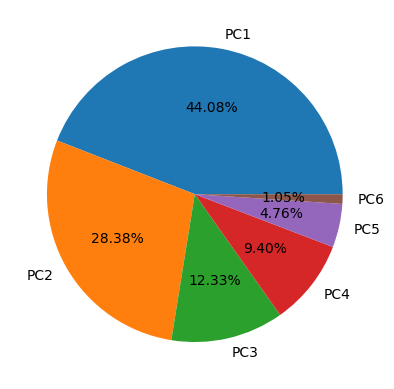

In [16]:
plt.pie(x =eigen_values,labels=["PC1","PC2","PC3","PC4","PC5","PC6"],autopct="%.2f%%")

#### **Validation**

In [17]:
pcomps_res = np.dot(x_stsc,eigen_vector.T)
pcomps_res

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [18]:
pcomps

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [19]:
pca_df = pd.DataFrame(pcomps,columns=["PC1","PC2","PC3","PC4","PC5","PC6"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825


#### Selecting 3 components for PCA :
##### Because it retains more than 75% of variance

In [20]:
final_pca = pca_df.iloc[:,:3]
final_pca.head()

,PC1,PC2,PC3
0,0.193291,-0.305100,-0.140878
1,0.434420,-0.328413,0.319007
2,0.811143,0.815096,1.523416
3,-0.778648,0.652754,0.163012
4,0.166287,1.271434,0.066279


#### KMeans model

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []
for i in range(1,21):
    model = KMeans(n_clusters=i)
    model.fit(final_pca)
    wcss.append(model.inertia_)

print("WCSS : \n",wcss)

WCSS : 
 [2238.553820039629, 1553.586621813053, 1206.0227382338107, 950.1344906467872, 688.6089146785417, 568.811225440377, 484.4677477950217, 428.06024983421014, 375.4942385347244, 344.43485182635936, 318.83019998829633, 300.46625941844735, 272.60778489026075, 252.02578621752792, 232.37310928465695, 218.2024716756161, 201.40091646797433, 182.53485871442444, 169.4218243433728, 160.05877140671362]


#### TO find the number of clusters

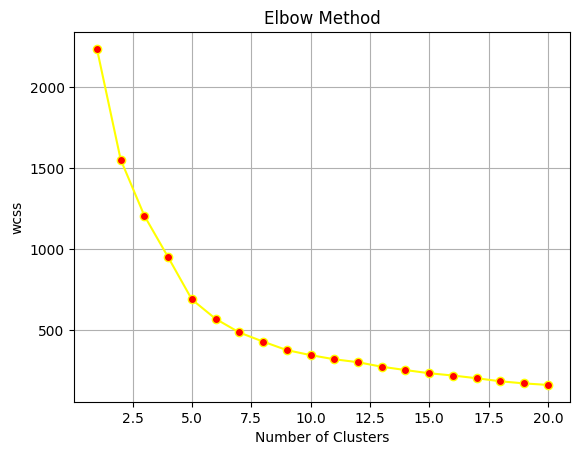

In [23]:
plt.plot(list(range(1,21)),wcss,marker="o",color="yellow",linestyle="-",markerfacecolor="red")
plt.title("Elbow Method")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
k5 = KMeans(n_clusters=5)
k5.fit(final_pca)

KMeans(n_clusters=5)

#### Prediction

In [25]:
ypred = k5.predict(final_pca)
ypred

array([1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 0, 2, 0, 1, 3, 2, 1, 1, 1, 3, 1, 2, 1, 3,
       1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

#### Centers of each clusters

In [26]:
cluster_centers = k5.cluster_centers_
print(cluster_centers)

[[-0.19163329  1.86301035 -0.95411732]
 [-0.74722126 -0.17418796  0.13654349]
 [ 1.37650756 -0.71947679  0.21810694]
 [ 7.28674184 -1.05985283 -0.84736335]
 [ 7.79794031 13.94908418  8.51512994]]
